In [136]:
import numpy as np
import requests
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/taylor/cloud.data'

In [95]:
! wget https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/taylor/cloud.data

--2022-10-08 19:40:40--  https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/taylor/cloud.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 209266 (204K) [application/x-httpd-php]
Saving to: ‘cloud.data.1’

cloud.data.1        100%[===================>] 204.36K   674KB/s    in 0.3s    

2022-10-08 19:40:40 (674 KB/s) - ‘cloud.data.1’ saved [209266/209266]



In [96]:
cloud = []

with open('cloud.data') as fid:
  for line in fid:
    line = line.strip()

    words = line.split()
    if len(words) == 0:
      continue
    
    try:
      numbers = list(map(float,words))
      cloud.append(numbers)
    except ValueError:
      pass


In [97]:
cloud = np.array(cloud)

cloudz = np.zeros(cloud.shape)
for colindex in range(cloudz.shape[1]):
  mean = np.mean(cloud[:,colindex])
  std = np.std(cloud[:,colindex],ddof=1)
  cloudz[:,colindex] = (cloud[:,colindex] - mean) / std


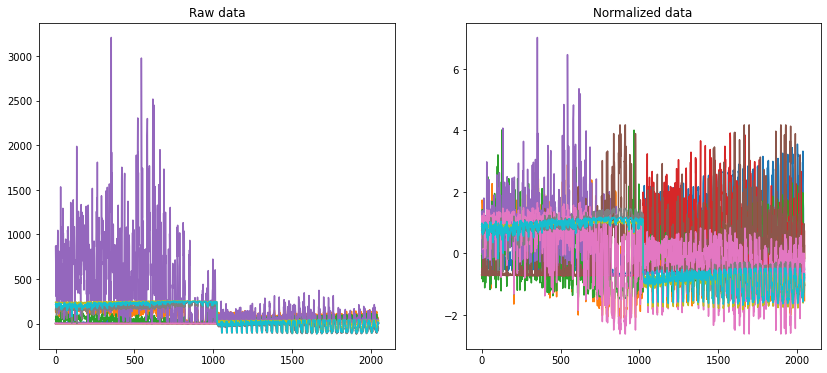

In [98]:
fig,ax = plt.subplots(1,2,figsize=(14,6))
ax[0].plot(cloud)
ax[0].set_title('Raw data')
ax[1].plot(cloudz)
ax[1].set_title('Normalized data')
plt.show()

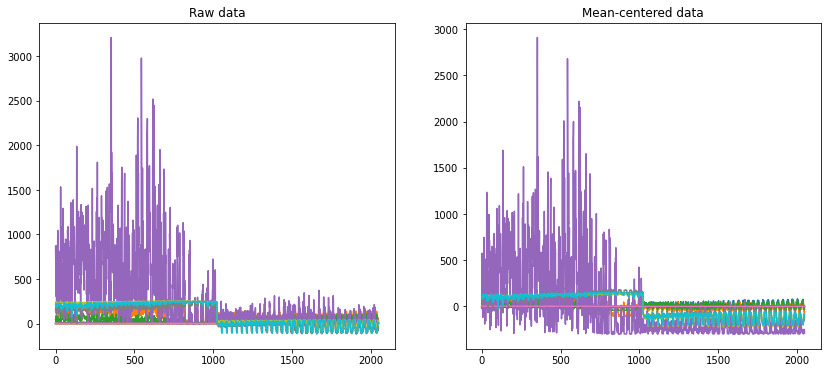

In [99]:
# Mean-centering raw data
cloudDemean = cloud - cloud.mean(axis=0)
fig,ax = plt.subplots(1,2,figsize=(14,6))
ax[0].plot(cloud)
ax[0].set_title('Raw data')
ax[1].plot(cloudDemean)
ax[1].set_title('Mean-centered data')
plt.show()

In [111]:
# Covariance matrices

# Features
cov_features = cloudDemean.T @ cloudDemean / (cloudDemean.shape[1] - 1)
cov_featuresZ = cloudz.T @ cloudz / (cloudz.shape[1] - 1)

# Observations
cov_observations = cloudDemean @ cloudDemean.T / (cloudDemean.shape[0] - 1)
cov_observationsZ = cloudz @ cloudz.T / (cloudz.shape[0] - 1)


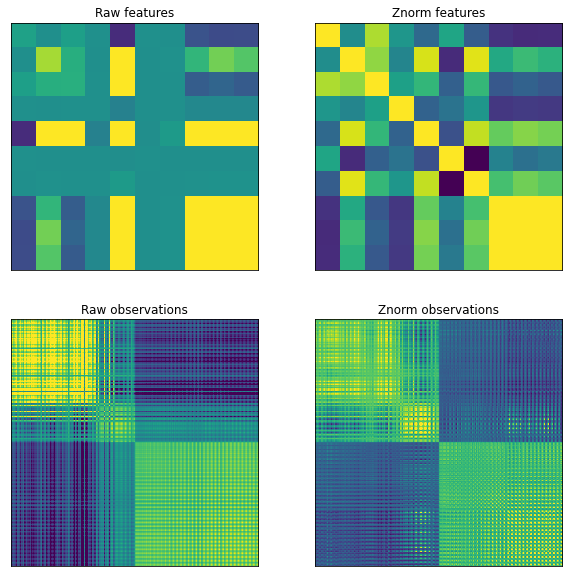

In [135]:
fig,ax = plt.subplots(2,2,figsize=(10,10))
ax[0,0].imshow(cov_features,vmin=-8e5,vmax=8e5)
ax[0,1].imshow(cov_featuresZ,vmin=-2e2,vmax=2e2)
ax[1,0].imshow(cov_observations,vmin=-1e2,vmax=1e2)
ax[1,1].imshow(cov_observationsZ,vmin=-5e-3,vmax=5e-3)

for i in range(ax.shape[0]):
  for j in range(ax.shape[1]):
    ax[i,j].set_xticks([])
    ax[i,j].set_yticks([])

ax[0,0].set_title('Raw features')
ax[0,1].set_title('Znorm features')
ax[1,0].set_title('Raw observations')
ax[1,1].set_title('Znorm observations')

plt.show()

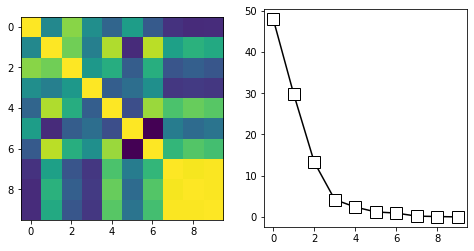

In [143]:
pca = PCA().fit(cloudz)
fig,ax = plt.subplots(1,2,figsize=(8,4))
ax[0].imshow(pca.get_covariance())
ax[1].plot(100 * pca.explained_variance_ratio_,'ks-',markerfacecolor='w',markersize=12)
plt.show()

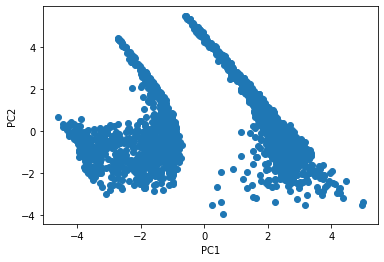

In [147]:
cloud2D = pca.transform(cloudz)
plt.plot(cloud2D[:,0], cloud2D[:,1],'o')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()